In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
audio_df = pd.read_csv("songs_popularity_for_lyrics_analysis.csv")   # oskar's
lyrics_df = pd.read_csv("spotify_millsongdata.csv")

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [15]:
#standardize
audio_df['track_name'] = audio_df['track_name'].str.lower().str.strip()
lyrics_df['track_name'] = lyrics_df['track_name'].str.lower().str.strip()

common = pd.merge(audio_df, lyrics_df, on=['track_name'], how='inner') #'artists',

print("Common songs found:", common.shape[0])
common.head()

Common songs found: 24545


,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,genre_punk,genre_comedy,genre_newgrass,genre_rock_en_español,energy_valence,dance_tempo,is_hit,artists,link,text
0,can't help falling in love,71.0,201933.0,0,0.266,0.0596,11.0,-18.515,1.0,0.0363,...,0,0,0,0,0.008523,48.34284,1,Bob Dylan,/b/bob+dylan/cant+help+falling+in+love_2002135...,Wise men say only fools rush in \r\nBut I can...
1,can't help falling in love,71.0,201933.0,0,0.266,0.0596,11.0,-18.515,1.0,0.0363,...,0,0,0,0,0.008523,48.34284,1,Ingrid Michaelson,/i/ingrid+michaelson/cant+help+falling+in+love...,Wise men say only fools rush in \r\nBut I can...
2,can't help falling in love,71.0,201933.0,0,0.266,0.0596,11.0,-18.515,1.0,0.0363,...,0,0,0,0,0.008523,48.34284,1,Neil Diamond,/n/neil+diamond/cant+help+falling+in+love_2072...,Wise men say \r\nOnly fools rush in \r\nBut ...
3,can't help falling in love,71.0,201933.0,0,0.266,0.0596,11.0,-18.515,1.0,0.0363,...,0,0,0,0,0.008523,48.34284,1,Andy Williams,/a/andy+williams/cant+help+falling+in+love_208...,"Wise men say, only fools rush in, \r\nBut I c..."
4,can't help falling in love,71.0,201933.0,0,0.266,0.0596,11.0,-18.515,1.0,0.0363,...,0,0,0,0,0.008523,48.34284,1,Bon Jovi,/b/bon+jovi/cant+help+falling+in+love_21062886...,Wise men say only fools rush in \r\nbut I can...


In [4]:
df = common.rename(columns={'text':'lyrics'})
#train/test split
X = df['lyrics']
y = df['is_hit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, lowercase=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
    
# logistic 
model = LogisticRegression(max_iter=500, n_jobs=-1)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [9]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

#inspect
feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]

#results
top_words = sorted(zip(coefficients, feature_names), reverse=True)[:25]
print("Top words predicting HIT:", top_words)

bottom_words = sorted(zip(coefficients, feature_names))[:10]
print("Top words predicting NOT HIT:", bottom_words)

              precision    recall  f1-score   support

           0       0.65      0.07      0.12      1162
           1       0.77      0.99      0.87      3747

    accuracy                           0.77      4909
   macro avg       0.71      0.53      0.50      4909
weighted avg       0.74      0.77      0.69      4909

Top words predicting HIT: [(np.float64(1.6349524346872222), 'blame'), (np.float64(1.5340815045385383), 'lean'), (np.float64(1.5101278549953023), 'send'), (np.float64(1.5064133781895455), 'fair'), (np.float64(1.4590788477445045), 'imagination'), (np.float64(1.4013527299912434), 'huh'), (np.float64(1.3877408190302458), 'hosanna'), (np.float64(1.3783702791543708), 'hero'), (np.float64(1.3357541355146014), 'lay'), (np.float64(1.3323420301841973), 'broken'), (np.float64(1.331127417310284), 'afraid'), (np.float64(1.3048305109767633), 'holiday'), (np.float64(1.2747785922081285), 'blind'), (np.float64(1.2728881107545515), 'satellite'), (np.float64(1.2670861063785075), 'sev

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

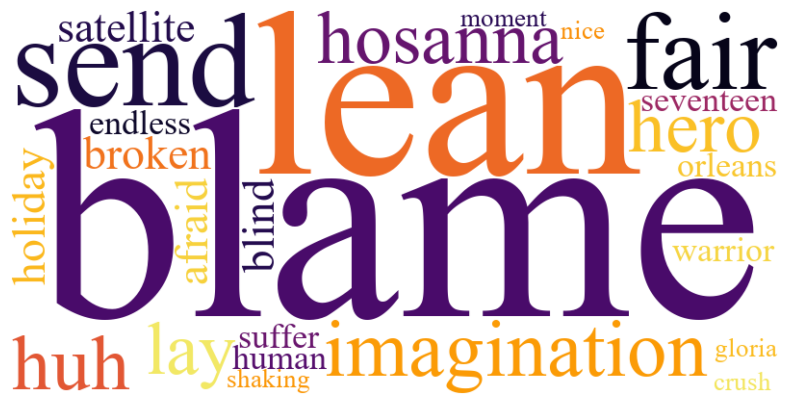

In [11]:
top_dict = {word: abs(coef) for coef, word in top_words}

# make word cloud
wc = WordCloud(width=800, height=400, background_color="white",font_path="C:/Windows/Fonts/times.ttf",colormap="inferno",).generate_from_frequencies(top_dict)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()